In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
import random
import math

# libreria locale
import my_lib_modificata as my

In [2]:
# FAR FUNZIONARE IL FIT
# variabili da associare alla funzione fit
# m, sigma_m, c, sigma_c, cov_mc, rho_mc = my.lin_fit...
# cose da inserire dentro la funzione fit
# array x, array y, sigma_y, xlabel, ylabel, title, xmin, xmax, ymin, ymax, plot=True

In [3]:
# X, SIGMA_X, Y, SIGMA_Y
theta = np.array([0.018, 0.032, 0.046, 0.068, 0.093]) 
sigma_theta = np.repeat(0.0002, len(theta))
a = np.array([0.1593, 0.2863, 0.4278, 0.6507, 0.8943])
sigma_a = np.array([0.0007, 0.0016, 0.0023, 0.0077, 0.0051])
theta, sigma_theta, a, sigma_a

(array([0.018, 0.032, 0.046, 0.068, 0.093]),
 array([0.0002, 0.0002, 0.0002, 0.0002, 0.0002]),
 array([0.1593, 0.2863, 0.4278, 0.6507, 0.8943]),
 array([0.0007, 0.0016, 0.0023, 0.0077, 0.0051]))

In [4]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (a.max()-a.min())/(theta.max()-theta.min())
m0

# STIMA DI M CON FIT PER SIGMA_L = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(theta, a, sigma_a, "Angolo", "Accelerazione", theta.min(), theta.max(), a.min(), a.max(), plot=True)

9.8

m         =  9.7785
sigma(m)  =  0.0689
c         =  -0.0204
sigma(c)  =  0.0027
cov(m, c) =  -0.0002
rho(m, c) =  -0.8639


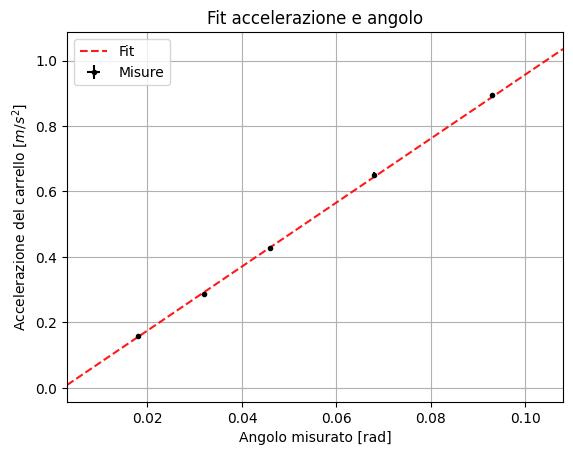

In [5]:
# NUOVE INCERTEZZE E FIT FINALE
sigma_a_new = np.sqrt(sigma_a**2 + (m0*sigma_theta)**2)
#sigma_a_new = sigma_a
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(theta, a, sigma_a_new, "Angolo misurato [rad]", "Accelerazione del carrello [$m/s^2$]", "Fit accelerazione e angolo", theta.min(), theta.max(), a.min(), a.max(), plot=True)

In [6]:
# STUDIO DEI RESIDUI
a_atteso = m*theta + c
d = a - a_atteso
d_norm = d / sigma_a_new

Text(0.5, 0, 'Angolo misurato [rad]')

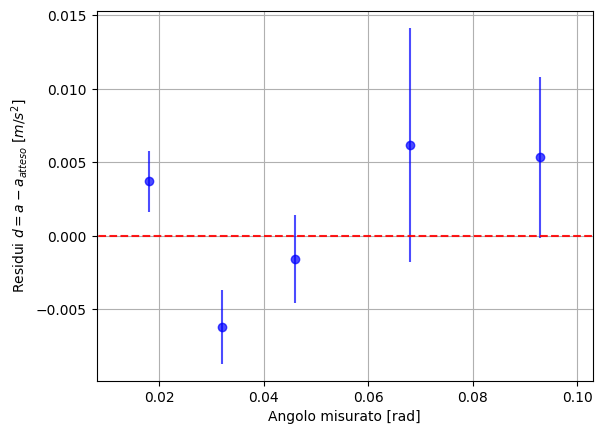

In [11]:
# RESIDUI
plt.grid()
plt.errorbar(theta, d, sigma_a_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([theta.min()-0.5, theta.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(theta.min()-0.01, theta.max()+0.01)
plt.ylabel("Residui $d=a-a_{atteso}$ [$m/s^2$]")
plt.xlabel("Angolo misurato [rad]")

Text(0.5, 0, 'Angolo misurato [rad]')

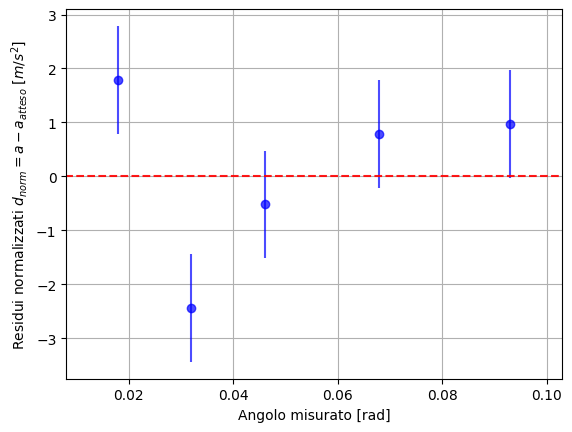

In [8]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(theta, d_norm, sigma_a_new/sigma_a_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([theta.min()-0.5, theta.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(theta.min()-0.01, theta.max()+0.01)
plt.ylabel("Residui normalizzati $d_{norm}=a-a_{atteso}$ [$m/s^2$]")
plt.xlabel("Angolo misurato [rad]")

In [9]:
# CALCOLO DI G E COMPATIBILITÀ
g = m
sigma_g = sigma_m
mu_d = - c/m
sigma_mud = np.sqrt((sigma_c/m)**2 + ((c*sigma_m)/(m**2))**2)
z_g = (g-9.8105)/sigma_g
print('Accelerazione di gravità: ', g)
print('Incertezza: ', sigma_g)
print('Coeff. attrito:',mu_d)
print('Incertezza:', sigma_mud)
print('Compatibilità: ', z_g)

Accelerazione di gravità:  9.778456475925866
Incertezza:  0.06894772914958303
Coeff. attrito: 0.0020899058193231935
Incertezza: 0.00027523611942674014
Compatibilità:  -0.46475097105249674
